In [1]:
import igraph
import numpy as np
import pandas as pd

# Data cleaning

In [134]:
df = pd.read_excel("支持信息.xls", 
                   sheet_name='Homo',
                   index_col=0)
df = df.fillna(0).astype(int)
df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,左内直肌,右内直肌,左睫状肌,右睫状肌,左瞳孔括约肌,右瞳孔括约肌,左眼上斜肌,右眼上斜肌,左眼外直肌,右眼外直肌
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
右瞳孔括约肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼外直肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Check names

In [135]:
# check names

col_names = list(df.columns)
row_names = list(df.index)
print("# colume names", len(col_names))
print("# row names", len(row_names))
print("names only existing in columes:", set(col_names)-set(row_names))
print("names only existing in rows:", set(row_names)-set(col_names))

names = set(col_names).intersection(row_names)
names = list(names)
print("# intersection names", len(names))

print(col_names==row_names)

# colume names 245
# row names 245
names only existing in columes: set()
names only existing in rows: set()
# intersection names 245
True


In [136]:
names

['右C1、C2',
 '右舌骨舌肌',
 '左孤束核',
 '左二腹肌前腹',
 '右丘脑外侧膝状体',
 '左睫状肌',
 '右三叉神经中脑核',
 '左腭咽肌',
 '右斜方肌',
 '左腭舌肌',
 '右上丘',
 '右颈阔肌',
 '左额肌',
 '左迷走神经背核',
 '左锤骨',
 '右二腹肌前腹',
 '右三叉神经半月神经节',
 '左环甲肌',
 '右颞顶肌',
 '左上颌骨',
 '下颌骨',
 '左上直肌',
 '右疑核',
 '右鼻肌',
 '左眼上斜肌',
 '左肩胛舌骨肌下段',
 '左镫骨肌',
 '左提口角肌',
 '右面神经核',
 '右迷走神经背核',
 '右环甲肌',
 '右嗅脑',
 '左面神经核',
 '左肩胛舌骨肌上段',
 '右颞肌',
 '右涡神经核',
 '右舌、会厌乳头',
 '右翼外肌上头',
 '右降下唇肌',
 '右环杓后肌',
 '左滑车神经核',
 '左帽状腱膜',
 '左眼外直肌',
 '右降鼻中隔肌',
 '右咽上缩肌',
 '右动眼神经核',
 '右口轮匝肌',
 '额骨',
 '左颞肌',
 '左三叉神经中脑核',
 '左舌、会厌乳头',
 '左颧大肌',
 '右提口角肌',
 '左胸骨甲状肌',
 '左动眼神经副核',
 '右杓状软骨',
 '右顶骨',
 '右咽鼓管咽肌',
 '左甲状舌骨肌',
 '右翼外肌下头',
 '右胸骨舌骨肌',
 '右双极细胞',
 '右上颌骨',
 '左涡神经核',
 '左大脑皮层味觉区',
 '右侧右半视网膜',
 '左咽上缩肌',
 '左环杓肌',
 '右眼上斜肌',
 '右颊肌',
 '左降下唇肌',
 '右侧左半视网膜',
 '左下颌舌骨肌',
 '右睫状肌',
 '右动眼神经副核',
 '右眼轮匝肌',
 '左侧左半视网膜',
 '左大脑皮层中央前回底部',
 '右降眉肌',
 '左胸锁乳突肌',
 '左咽下缩肌',
 '右颧小肌',
 '左笑肌',
 '左颏舌肌',
 '右二腹肌后腹',
 '左舌下神经核',
 '右颏舌肌',
 '右大脑皮层视觉区',
 '左三叉神经半月神经节',
 '右咬肌',
 '右枕肌',
 '右三叉神经脑桥核',
 '右大脑皮层味觉区',
 '左鼻骨',
 '左腭骨',
 '左砧骨',
 '右嗅觉细胞（嗅觉粘膜）',
 '左颏

In [137]:
fil_df = df.loc[col_names, col_names]
fil_df

,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,左内直肌,右内直肌,左睫状肌,右睫状肌,左瞳孔括约肌,右瞳孔括约肌,左眼上斜肌,右眼上斜肌,左眼外直肌,右眼外直肌
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
右瞳孔括约肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼外直肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# save
fil_df.to_csv("filtered_data.csv")

## Check adjacent matrix

In [138]:
def check_sym(df: pd.DataFrame, r, c):
    if df.iloc[r, c] != df.iloc[c, r]:
        print(df.index[r], df.columns[c])

In [151]:
arr = fil_df.to_numpy()
print('max', arr.sum(1).max())
print('sum', arr.sum())
arr

max 36
sum 1286


array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [142]:
arr.trace()

0

In [143]:
idx = np.where(arr!=arr.T)
idx

(array([ 32,  32,  32,  32,  32,  32,  33,  33,  33,  33,  33,  33,  42,
         42,  42,  42,  42,  42,  42,  42,  43,  43,  43,  43,  43,  43,
         43,  43,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,  58,
         58,  58,  58,  58,  59,  59,  59,  59,  59,  59,  59,  59,  59,
         59,  59,  59,  59,  59,  59,  60,  60,  60,  60,  60,  60,  60,
         60,  60,  60,  60,  60,  60,  60,  61,  61,  61,  61,  61,  61,
         61,  61,  61,  61,  61,  61,  61,  61, 109, 110, 111, 112, 113,
        114, 161, 161, 162, 162, 163, 163, 164, 164, 165, 165, 166, 166,
        177, 177, 178, 178, 179, 179, 180, 180, 181, 182, 187, 187, 188,
        188, 189, 189, 190, 190, 193, 193, 194, 194, 195, 195, 196, 196,
        197, 197, 198, 198, 199, 199, 200, 200, 201, 201, 202, 202, 203,
        203, 204, 204, 205, 205, 206, 206, 207, 207, 208, 208, 209, 210,
        211, 211, 212, 212, 213, 213, 214, 214, 215, 215, 216, 216, 217,
        217, 218, 218]),
 array([161, 163, 165, 177

In [144]:
for i, j in zip(*idx):
    if i < j:
        check_sym(fil_df, i, j)

左三叉神经运动核 左下颌舌骨肌
左三叉神经运动核 左二腹肌前腹
左三叉神经运动核 左腭帆张肌
左三叉神经运动核 左茎突舌骨肌
左三叉神经运动核 左二腹肌后腹
左三叉神经运动核 左茎突咽肌
右三叉神经运动核 右下颌舌骨肌
右三叉神经运动核 右二腹肌前腹
右三叉神经运动核 右腭帆张肌
右三叉神经运动核 右茎突舌骨肌
右三叉神经运动核 右二腹肌后腹
右三叉神经运动核 右茎突咽肌
左面神经核 左骨膜张肌
左面神经核 左镫骨肌
左面神经核 左颈阔肌
左面神经核 左下颌舌骨肌
左面神经核 左二腹肌前腹
左面神经核 左腭帆张肌
左面神经核 左茎突舌骨肌
左面神经核 左二腹肌后腹
右面神经核 右骨膜张肌
右面神经核 右镫骨肌
右面神经核 右颈阔肌
右面神经核 右下颌舌骨肌
右面神经核 右二腹肌前腹
右面神经核 右腭帆张肌
右面神经核 右茎突舌骨肌
右面神经核 右二腹肌后腹
左舌下神经核 左咽中缩肌
左舌下神经核 左咽下缩肌
左舌下神经核 左咽上缩肌
左舌下神经核 左腭咽肌
左舌下神经核 左腭帆提肌
左舌下神经核 左咽鼓管咽肌
左舌下神经核 左甲杓肌
左舌下神经核 左环杓肌
左舌下神经核 杓横肌
左舌下神经核 左环杓后肌
左舌下神经核 左颏舌骨肌
左舌下神经核 左颏舌肌
左舌下神经核 左舌骨舌肌
左舌下神经核 左茎突舌肌
左舌下神经核 左腭舌肌
右舌下神经核 右咽中缩肌
右舌下神经核 右咽下缩肌
右舌下神经核 右咽上缩肌
右舌下神经核 右腭咽肌
右舌下神经核 右腭帆提肌
右舌下神经核 右咽鼓管咽肌
右舌下神经核 右甲杓肌
右舌下神经核 右环杓肌
右舌下神经核 杓斜肌
右舌下神经核 右环杓后肌
右舌下神经核 右颏舌骨肌
右舌下神经核 右颏舌肌
右舌下神经核 右舌骨舌肌
右舌下神经核 右茎突舌肌
右舌下神经核 右腭舌肌
左副神经核 左咽中缩肌
左副神经核 左咽下缩肌
左副神经核 左咽上缩肌
左副神经核 左腭咽肌
左副神经核 左腭帆提肌
左副神经核 左咽鼓管咽肌
左副神经核 左甲杓肌
左副神经核 左环杓肌
左副神经核 杓横肌
左副神经核 左环杓后肌
左副神经核 左颏舌肌
左副神经核 左舌骨舌肌
左副神经核 左茎突舌肌
左副神经核 左腭舌肌
右副神经核 右咽中缩肌
右副神经核 右咽下缩肌
右副神经核 右咽上缩肌
右副神经核 右腭咽肌
右副神经核 右腭帆提肌
右副神经核 右咽鼓管咽肌
右副神经

In [153]:
# save to csv
df2 = fil_df.copy()
for i, j in zip(*idx):
    df2.iloc[i, j] = 1
arr = df2.to_numpy()
print(arr.trace())
print(np.all(arr.T==arr))
print("max", np.max(arr.sum(1)))
print("sum", np.sum(arr))

0
True
max 36
sum 1372


In [154]:
df2.to_csv('filtered_data.csv')
del df2

# NIMS

In [2]:
df = pd.read_csv('filtered_data.csv', index_col=0)
print(len(df))
arr = df.to_numpy()
print('sum', arr.sum())
print('trace', arr.trace())
print('max', np.max(arr.sum(1)))
df

245
sum 1372
trace 0
max 36


,左嗅觉细胞（嗅觉粘膜）,右嗅觉细胞（嗅觉粘膜）,左嗅脑,右嗅脑,左侧左半视网膜,左侧右半视网膜,右侧左半视网膜,右侧右半视网膜,左丘脑外侧膝状体,右丘脑外侧膝状体,...,左内直肌,右内直肌,左睫状肌,右睫状肌,左瞳孔括约肌,右瞳孔括约肌,左眼上斜肌,右眼上斜肌,左眼外直肌,右眼外直肌
左嗅觉细胞（嗅觉粘膜）,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅觉细胞（嗅觉粘膜）,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左嗅脑,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右嗅脑,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左侧左半视网膜,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
右瞳孔括约肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
右眼上斜肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
左眼外直肌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# construct a graph from an adjacent matrix
adj_mat = df.to_numpy()
g = igraph.Graph.Adjacency(adj_mat, mode='undirected')
g.vs["name"] = df.columns
print(g)

IGRAPH UN-- 245 686 --
+ attr: name (v)
+ edges (vertex names):
左嗅觉细胞（嗅觉粘膜） -- 左嗅脑
右嗅觉细胞（嗅觉粘膜） -- 右嗅脑
        左嗅脑 -- 左嗅觉细胞（嗅觉粘膜）
        右嗅脑 -- 右嗅觉细胞（嗅觉粘膜）
    左侧左半视网膜 -- 右丘脑外侧膝状体
    左侧右半视网膜 -- 左丘脑外侧膝状体
    右侧左半视网膜 -- 右丘脑外侧膝状体
    右侧右半视网膜 -- 左丘脑外侧膝状体
   左丘脑外侧膝状体 -- 左侧右半视网膜, 右侧右半视网膜, 左上丘
   右丘脑外侧膝状体 -- 左侧左半视网膜, 右侧左半视网膜, 右上丘
        左上丘 -- 左丘脑外侧膝状体, 左大脑皮层视觉区
        右上丘 -- 右丘脑外侧膝状体, 右大脑皮层视觉区
   左大脑皮层视觉区 -- 左上丘, 左脑膜
   右大脑皮层视觉区 -- 右上丘, 右脑膜
   左大脑皮层听觉区 -- 左涡神经核, 右涡神经核, 左脑膜
   右大脑皮层听觉区 -- 左涡神经核, 右涡神经核, 右脑膜
左大脑皮层中央前回底部 -- 左大脑皮层中央后回底部, 左滑车神经核, 右滑车神经核, 左三叉神经运动核, 右三叉神经运动核, 左面神经核, 右面神经核,
左展神经核, 右展神经核, 左疑核, 右疑核, 右迷走神经背核, 右舌下神经核, 左副神经核, 右副神经核, 左副神经脊髓根, 右副神经脊髓根,
右C1、C2, 左脑膜
右大脑皮层中央前回底部 -- 右大脑皮层中央后回底部, 左滑车神经核, 右滑车神经核, 左三叉神经运动核, 右三叉神经运动核, 左面神经核, 右面神经核,
左展神经核, 右展神经核, 左疑核, 右疑核, 左迷走神经背核, 左舌下神经核, 左副神经核, 右副神经核, 左副神经脊髓根, 右副神经脊髓根,
左C1、C2, 右脑膜
左大脑皮层中央后回底部 -- 左大脑皮层中央前回底部, 左三叉神经中脑核, 右三叉神经中脑核, 左三叉神经脑桥核, 右三叉神经脑桥核, 左三叉神经脊束核,
右三叉神经脊束核, 右三叉神经半月神经节, 左脑膜
右大脑皮层中央后回底部 -- 右大脑皮层中央前回底部, 左三叉神经中脑核, 右三叉神经中脑核, 左三叉神经脑桥核, 右三叉神

In [4]:
for i in range(1000):
    idx = np.random.randint(0, len(df), 2)
    r_name, c_name = df.columns[idx[0]], df.columns[idx[1]]
    r, c = list(df.index).index(r_name), list(df.columns).index(c_name)
    ei = len(g.es.select(_within=[g.vs.find(name=r_name).index, g.vs.find(name=c_name).index]))
    if df.loc[r_name, c_name] != ei:
        print(r_name, c_name, df.loc[r_name, c_name], ei)
        print(arr[r, c], r, c)
        print(g.vs.find(name=r_name), g.vs.find(name=c_name))
        print()

In [5]:
len(g.es.select(_within=[g.vs.find(name=r_name), g.vs.find(name=c_name)]))

0

In [6]:
g.get_eid(59, 196, error=False)

244

In [7]:
len(g.es.select(_within=[59, 196]))

1

In [8]:
g.vs.find(name='右舌下神经核')

igraph.Vertex(<igraph.Graph object at 0x7f11d447b310>, 59, {'name': '右舌下神经核'})

In [9]:
g.write("a.lgl")

/home/kent/miniconda3/envs/torch1.10/lib/python3.9/site-packages/igraph/__init__.py:2988: RuntimeWarning: weights attribute does not exists at src/io/lgl.c:249
  return writer(f, *args, **kwds)


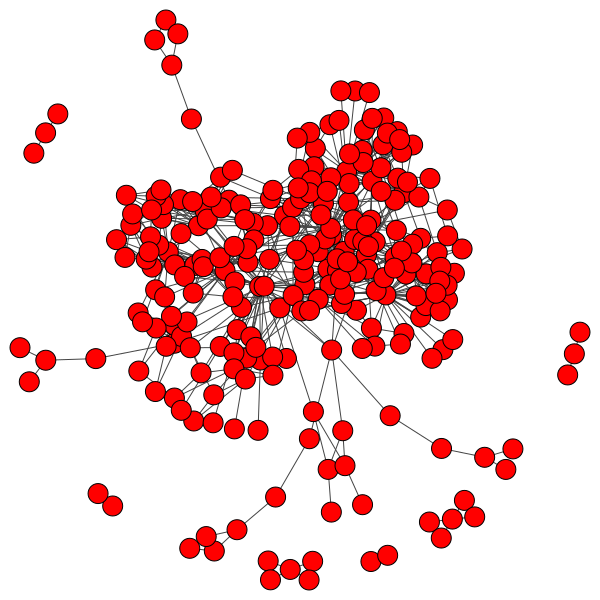

In [10]:
igraph.plot(g)

In [15]:
# connected components
np.unique(g.clusters().membership)

array([0, 1, 2, 3, 4, 5, 6])